In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = np.loadtxt("digits.txt")

X = data[:,:-1]
Y = data[:,-1]
print(data.shape)
print(X)
print(Y)




(1797, 65)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0. 1. 2. ... 8. 9. 8.]


In [55]:
X_shape_zero = X[0,:].reshape(8,8)
print(X_shape_zero)
#On peut voir le 0 dans la matrice

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


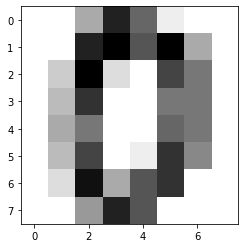

In [56]:
plt.imshow(X_shape_zero, cmap='gray_r')
plt.show()


In [57]:
#Quels sont les valeurs d et k dans ce problème ? Combien y a-t-il de paramètres àapprendre dans ce modèle ?
#Le d est la taille de la matrice
#Le k est le nombre de classes, d'object à trier (k= 10) 0-9

#Nombre de paramètres à prendre en compte : d+1 * k = le nombre de paramètres interessant
d = X.shape[1]
k = 10
print("d :", d)
nbParam = (d+1)*k
print("Nombre de paramètres ", nbParam)

d : 64
Nombre de paramètres  650


In [58]:
#4),nbParam
np.random.seed(10)
weights = np.random.randn(d+1, k)/100
#print(weight)

In [59]:
#5)
X = np.hstack ((np.ones((X.shape[0], 1)),X))
print(X)
print(X.shape)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ... 10.  0.  0.]
 [ 1.  0.  0. ... 16.  9.  0.]
 ...
 [ 1.  0.  0. ...  6.  0.  0.]
 [ 1.  0.  0. ... 12.  0.  0.]
 [ 1.  0.  0. ... 12.  1.  0.]]
(1797, 65)


In [60]:
#6) Créer une fonction nommée output qui prend en paramètre une matrice d’entrées X et la matrice
#des paramètres du modèle et renvoie la matrice des sorties du modèle.

def output(X1 , weights1):
    outputX = np.dot(X1, weights1) #outputX = sortie
    exp = np.exp(outputX)
    sum = np.sum(exp,1)
    print(sum.shape[0])
    return exp/sum.reshape(sum.shape[0], 1)


In [61]:
#Tester cette fonction avec la matrice X des entrées du dataset digits 
#afin d’obtenir une matricef contenant l’ensemble des sorties du modèle.
#Afficher ensuite cette matrice des sorties dumodèle et calculer la somme par
#ligne de cette matrice pour vérifier que tout est cohérent.

#7)
predictionf = output(X, weights)

1797


In [62]:

# Transformer le vecteur y des labels de façon à obtenir une matrice avec un
#one hot encoding ligne par ligne. cf. en haut du slide 5 du cours 7

#s = pd.Series(Y)
#hotEncoded = pd.get_dummies(s)
#print(hotEncoded)
# OU
y_one_hot = np.zeros((Y.shape[0], k))
for i in range(Y.shape[0]):
    y_one_hot[1, int(Y[i])] = 1

In [10]:
#Créer une fonction nommée crossentropy qui prend en paramètre une matrice de prédictionsf et une matrice y_one_hot
#correspondant au "one hot encoding" des labels et qui calcule le terme 
#d’erreur global défini par l’équation 2 du slide 5 du cours 7.    
    
def crossEntropy(predictionf, y_one_hot):
    return -(y_one_hot*np.log(predictionf)).sum()/y_one_hot.shape[0]
    
print(crossEntropy(predictionf, y_one_hot))


0.013430580301035156


In [11]:
#Tester cette fonction avec la matrice f précédemment obtenue et la matrice des labels avec le one hot encoding obtenu à la question 8
#Proposer une matrice de sortie du modèle plausible pour laquelle le terme d’erreur sera trèsproche de 
f_test = y_one_hot *0.991 + (1-y_one_hot)*0.01
print(crossEntropy(f_test, y_one_hot))



5.031020952781898e-05


In [12]:
#Créer une fonction nommée prediction qui prend en entrée une matrice f contenant l’ensemble des sorties du modèle
#et renvoie le vecteur avec l’ensemble des classes prédites pour tous les exemples.
def prediction (f):
        return np.argmax(predictionf,1)
    